In [11]:
from preprocessing import load_data
from GCN import NodeClassificationGCNN
import torch
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ImportError: cannot import name 'load_data' from 'preprocessing' (c:\Users\PRML\Documents\GitHub\Graph-Convolutional-Networks\preprocessing.py)

In [ ]:
adj, features, labels, idx_train, idx_val, idx_test = load_data("./cora/", "cora")

In [ ]:
model = NodeClassificationGCNN(features.shape[1], 256, np.max(labels.detach().numpy())+1)

In [ ]:
def accuracy(out,label):
    oneHotCodded = out.max(1)[1].type_as(label)
    return oneHotCodded.eq(label).double().sum()/len(label)

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

epochs=100
optimizer = optim.Adam(model.parameters(),lr=0.01)
train_losses=[]
val_losses=[]
train_accuracy=[]
val_accuracy=[]
for epoch in range(epochs):
    model.train()
    train_labels=labels[idx_train]
    val_labels=labels[idx_val]
    
    
    optimizer.zero_grad()
    output = model(features, adj)
    train_loss=F.nll_loss(output[idx_train],train_labels)
    train_losses.append(train_loss)
    t_a=accuracy(output[idx_train],train_labels)
    train_accuracy.append(t_a)
    print(f"Training epoch {epoch} ; accuracy: {accuracy(output[idx_train],train_labels)}; loss: {train_loss.item()}")
    train_loss.backward()
    optimizer.step()
    
    model.eval()
    output = model(features, adj)
    val_loss=F.nll_loss(output[idx_val],val_labels)
    val_losses.append(val_loss)
    v_a=accuracy(output[idx_val],val_labels)
    val_accuracy.append(v_a)
    print(f"Validation epoch {epoch} ; accuracy: {accuracy(output[idx_val],val_labels)}; loss: {val_loss.item()}")
    

Training epoch 0 ; accuracy: 0.10714285714285714; loss: 1.9457539319992065
Validation epoch 0 ; accuracy: 0.5966666666666667; loss: 1.8892093896865845
Training epoch 1 ; accuracy: 0.6785714285714286; loss: 1.8731789588928223
Validation epoch 1 ; accuracy: 0.67; loss: 1.8177063465118408
Training epoch 2 ; accuracy: 0.7428571428571429; loss: 1.7816976308822632
Validation epoch 2 ; accuracy: 0.7; loss: 1.7345002889633179
Training epoch 3 ; accuracy: 0.8071428571428572; loss: 1.6723486185073853
Validation epoch 3 ; accuracy: 0.7166666666666667; loss: 1.6444607973098755
Training epoch 4 ; accuracy: 0.85; loss: 1.549349069595337
Validation epoch 4 ; accuracy: 0.7266666666666667; loss: 1.550209403038025
Training epoch 5 ; accuracy: 0.8714285714285714; loss: 1.425474762916565
Validation epoch 5 ; accuracy: 0.73; loss: 1.4545978307724
Training epoch 6 ; accuracy: 0.9071428571428571; loss: 1.3021947145462036
Validation epoch 6 ; accuracy: 0.7466666666666667; loss: 1.3596301078796387
Training epo

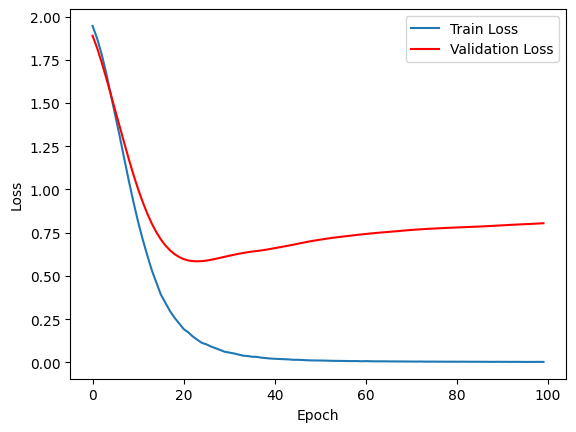

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert tensors to float for plotting
train_losses_float = [float(train_loss.cpu().detach().numpy()) for train_loss in train_losses]
train_loss_indices = [i for i, _ in enumerate(train_losses_float)]

sns.lineplot(x=train_loss_indices, y=train_losses_float, label='Train Loss')

val_losses_float = [float(val_loss.cpu().detach().numpy()) for val_loss in val_losses]
val_loss_indices = [i for i, _ in enumerate(val_losses_float)]

sns.lineplot(x=val_loss_indices, y=val_losses_float, color='r', label='Validation Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
t_a = t_a.cpu().detach().numpy()
v_a = v_a.cpu().detach().numpy()

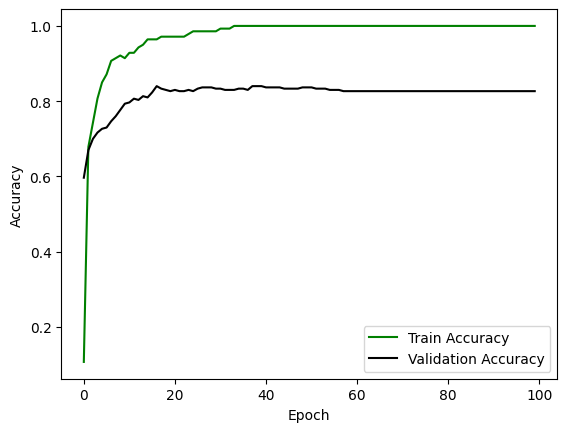

In [ ]:
# Convert train accuracy tensors to float
train_accuracy_float = [float(t_a.cpu().detach().numpy()) for t_a in train_accuracy]
t_a_indices = [i for i, _ in enumerate(train_accuracy_float)]

sns.lineplot(x=t_a_indices, y=train_accuracy_float, color='green', label='Train Accuracy')

# Convert validation accuracy tensors to float
val_accuracy_float = [float(v_a.cpu().detach().numpy()) for v_a in val_accuracy]
v_a_indices = [i for i, _ in enumerate(val_accuracy_float)]

sns.lineplot(x=v_a_indices, y=val_accuracy_float, color='black', label='Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_losses=[]
model.eval()
test_labels=labels[idx_test]
output = model(features, adj)
loss=F.nll_loss(output[idx_test],test_labels)
test_losses.append(loss)
print(f"Test set ; accuracy: {accuracy(output[idx_test],test_labels)}; loss: {loss.item()}")

Test set ; accuracy: 0.802; loss: 0.6541292667388916


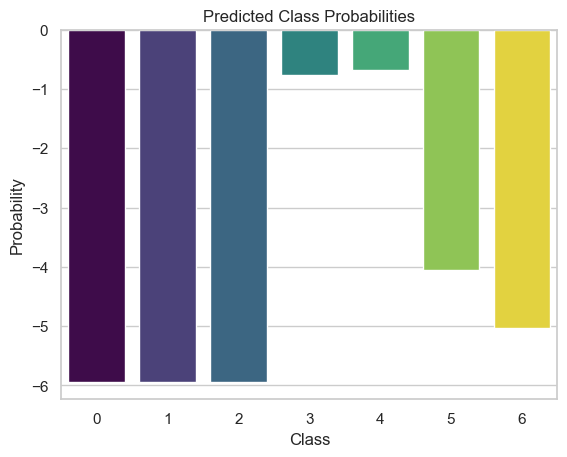

In [ ]:
sample = 500
sns.set_theme(style="whitegrid")

pred = model(features, adj)
probs = pred[sample].detach().cpu().numpy()

sns.barplot(x=np.arange(len(probs)), y=probs, hue=np.arange(len(probs)), palette="viridis", legend=False)

plt.xlabel("Class")
plt.ylabel("Probability")
plt.title(f"Predicted Class Probabilities")
plt.show()

In [ ]:
output_idx_test=output[idx_test]

In [ ]:
df_output_idx_test=pd.DataFrame(output_idx_test.detach().numpy())
df_output_idx_test

,0,1,2,3,4,5,6
0,-5.937459,-5.937459,-5.937459,-0.772169,-0.680975,-4.051135,-5.028566
1,-4.956459,-5.375089,-5.756124,-3.959473,-3.844054,-0.061390,-5.465036
2,-7.719209,-7.829350,-7.794329,-0.019795,-7.829350,-4.068847,-7.068422
3,-5.721179,-6.358754,-6.472843,-5.472157,-4.105203,-0.029052,-6.576289
4,-6.008066,-5.488571,-5.406619,-0.058861,-4.019218,-4.598310,-4.014763
...,...,...,...,...,...,...,...
995,-4.864145,-5.147548,-4.986351,-3.370492,-0.144203,-2.717439,-4.304388
996,-10.730996,-8.197018,-0.000423,-10.209298,-10.595472,-9.991775,-10.915506
997,-6.807709,-5.104410,-0.022480,-4.843966,-6.167726,-5.841842,-6.128974
998,-3.367548,-1.312568,-0.760349,-2.075041,-3.213847,-3.241684,-3.727888


In [ ]:
df_test_labels=pd.DataFrame(test_labels.numpy())
print(type(df_test_labels))
df_test_labels.T

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3,5,3,5,5,5,3,6,6,1,...,5,6,6,5,5,4,2,2,2,5
